In [9]:
import tensorflow as tf
import numpy as np

In [18]:
a = tf.constant([2])
b = tf.constant([20])

In [19]:
@tf.function
def add(a,b):
    c = tf.add(a, b)
    #c = a + b is also a way to define the sum of the terms
    #print(c)
    return c

In [20]:
result = tf.add(a,b)
tf.print(result.numpy()[0])

22


In [21]:
A = tf.constant([[1,2,3],[2,3,4],[4,5,6]])
tf.print(A.shape)

TensorShape([3, 3])


In [22]:
b = np.array([[1,1,1]]).reshape(3,1)
c = A@b
print(c.numpy())

[[ 6]
 [ 9]
 [15]]


In [23]:
Matrix_one = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
Matrix_two = tf.constant([[2,2,2],[2,2,2],[2,2,2]])

@tf.function
def add():
    add_1_operation = tf.add(Matrix_one, Matrix_two)
    return add_1_operation



print ("Defined using tensorflow function :")
add_1_operation = add()
print(add_1_operation)
print ("Defined using normal expressions :")
add_2_operation = Matrix_one + Matrix_two
print(add_2_operation)

Defined using tensorflow function :
tf.Tensor(
[[3 4 5]
 [4 5 6]
 [5 6 7]], shape=(3, 3), dtype=int32)
Defined using normal expressions :
tf.Tensor(
[[3 4 5]
 [4 5 6]
 [5 6 7]], shape=(3, 3), dtype=int32)


In [24]:

Matrix_one = tf.constant([[2,3],[3,4]])
Matrix_two = tf.constant([[2,3],[3,4]])

@tf.function
def mathmul():http://jrmeyer.github.io/machinelearning/2016/02/01/TensorFlow-Tutorial.html
  return tf.matmul(Matrix_one, Matrix_two)


mul_operation = mathmul()

print ("Defined using tensorflow function :")
print(mul_operation)


Defined using tensorflow function :
tf.Tensor(
[[13 18]
 [18 25]], shape=(2, 2), dtype=int32)


In [27]:
tf.print(Matrix_one.numpy())
tf.print(Matrix_two.numpy())

array([[2, 3],
       [3, 4]], dtype=int32)
array([[2, 3],
       [3, 4]], dtype=int32)


### Why Tensors?

The Tensor structure helps us by giving the freedom to shape the dataset in the way we want.

And it is particularly helpful when dealing with images, due to the nature of how information in images are encoded,

Thinking about images, its easy to understand that it has a height and width, so it would make sense to represent the information contained in it with a two dimensional structure (a matrix)... until you remember that images have colors, and to add information about the colors, we need another dimension, and thats when Tensors become particularly helpful.

Images are encoded into color channels, the image data is represented into each color intensity in a color channel at a given point, the most common one being RGB, which means Red, Blue and Green.

### Variables

In [50]:
v = tf.Variable(5)
@tf.function
def inc_one(v):
    v = tf.add(v,2)
    return v

In [51]:
for i in range(3):
    v = inc_one(v)
    print('v = ',v.numpy())

v =  7
v =  9
v =  11


In [56]:
a = tf.constant([4])
tf.add(a,v).numpy()[0]

15

### Important links
* A tensorflow tutorial for email classification : http://jrmeyer.github.io/machinelearning/2016/02/01/TensorFlow-Tutorial.html

### Eagerly execution

In [57]:
# verify eager execution is enabled
tf.executing_eagerly()

True

### Linear Regression using TF

In [59]:
#get dataset
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2021-04-21 18:33:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   115KB/s    in 0.6s    

2021-04-21 18:33:44 (115 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [141]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
#Example of Solving gradient 
with tf.GradientTape() as tape:
    x = tf.constant([[1.,2.],[3,4]])
    tape.watch(x)
    y = x*x
    grad_y = tape.gradient(y,x)
    print('y=',y.numpy())
    print('Gradient of y = ')
    print(grad_y.numpy())

y= [[ 1.  4.]
 [ 9. 16.]]
Gradient of y = 
[[2. 4.]
 [6. 8.]]


In [143]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets say we want to use linear regression to predict Co2Emission of cars based on their engine size. So, lets define X and Y value for the linear regression, that is, train_x and train_y:


In [144]:
train_x = np.array(df[['ENGINESIZE']])
train_y = np.array(df[['CO2EMISSIONS']])

In [145]:
a = tf.Variable(19.0)
b = tf.Variable(11.0)

def h(x):
    y = a*x + b
    return y

In [146]:
def loss_object(y,train_y):
    return tf.reduce_mean(tf.square(y-train_y))

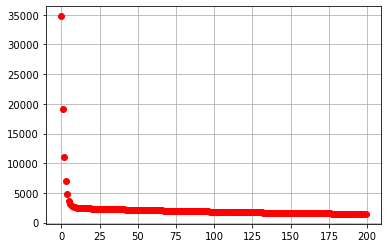

In [147]:
learning_rate = 0.01
loss_values = np.array([])
train_data = np.array([])

for epoch in range(200):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        #print(y_predicted.shape)
        loss_value = loss_object(y_predicted,train_y)
        loss_values = np.append(loss_values,loss_value)
        
        grad = tape.gradient(loss_value,[b,a])
    
        #weight update
        b.assign_sub(grad[0]*learning_rate)
        a.assign_sub(grad[1]*learning_rate)
        #print(grad)
        if epoch % 5 == 0:
            np.append(train_data,np.array([a.numpy(), b.numpy()]))

            
plt.grid()
plt.plot(loss_values,'ro')
#plt.legend()

### Logistic Regression

In [148]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [149]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y= pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

In [162]:
numFeatures = trainX.shape[1]
numLabels = trainY.shape[1]

In [163]:
trainX = tf.constant(trainX,dtype='float32')
trainY = tf.constant(trainY,dtype='float32')
testX = tf.constant(testX,dtype='float32')
testY = tf.constant(testY,dtype='float32')

W = tf.Variable(tf.zeros([4,3]))
b = tf.Variable(tf.zeros([3]))

In [166]:
weights = tf.Variable(tf.random.normal([numFeatures,numLabels],mean = 0.,stddev =0.01),dtype='float32')
bias = tf.Variable(tf.random.normal([1,numLabels],mean = 0., stddev = 0.01))

In [164]:
def logistic_reg(x):
    return tf.nn.sigmoid(tf.add(tf.matmul(x,weights) , bias))

In [172]:
# Accuracy metric.
def accuracy(y_pred, y_true):
# Predicted class is the index of the highest score in prediction vector (i.e. argmax).

    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))

    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [173]:
numEpochs = 700

learning_rate = 0.001
loss_object = tf.keras.losses.MeanSquaredLogarithmicError()
optimizer = tf.keras.optimizers.SGD(learning_rate)


In [174]:
def run_optimization(x,y):
    with tf.GradientTape() as g:
        pred = logistic_reg(trainX)
        loss = loss_object(pred,y)
    gradients = g.gradient(loss,[weights,bias])
    optimizer.apply_gradients(zip(gradients,[weights,bias]))

In [175]:
# Initialize reporting variables
display_step = 10
epoch_values = []
accuracy_values = []
loss_values = []
loss = 0
diff = 1
# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in loss %g; convergence."%diff)
        break
    else:
        # Run training step
        run_optimization(trainX, trainY)
        
        # Report occasional stats
        if i % display_step == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            
            pred = logistic_reg(testX)

            newLoss = loss_object(pred, testY)
            # Add loss to live graphing variable
            loss_values.append(newLoss)
            
            # Generate accuracy stats on test data
            acc = accuracy(pred, testY)
            accuracy_values.append(acc)
            
    
            # Re-assign values for variables
            diff = abs(newLoss - loss)
            loss = newLoss

            #generate print statements
            print("step %d, training accuracy %g, loss %g, change in loss %g"%(i, acc, newLoss, diff))

        

          

# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %acc.numpy())




step 0, training accuracy 0.32, loss 0.132406, change in loss 0.132406
step 10, training accuracy 0.32, loss 0.131767, change in loss 0.000639737
step 20, training accuracy 0.32, loss 0.13114, change in loss 0.0006271
step 30, training accuracy 0.32, loss 0.130525, change in loss 0.000614494
step 40, training accuracy 0.32, loss 0.129923, change in loss 0.000602037
step 50, training accuracy 0.32, loss 0.129333, change in loss 0.000589684
step 60, training accuracy 0.32, loss 0.128756, change in loss 0.000577465
step 70, training accuracy 0.32, loss 0.128191, change in loss 0.00056535
step 80, training accuracy 0.32, loss 0.127637, change in loss 0.000553384
step 90, training accuracy 0.32, loss 0.127096, change in loss 0.000541553
step 100, training accuracy 0.32, loss 0.126566, change in loss 0.00052993
step 110, training accuracy 0.32, loss 0.126047, change in loss 0.000518411
step 120, training accuracy 0.32, loss 0.12554, change in loss 0.000507072
step 130, training accuracy 0.32

/home/shantanu/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shantanu/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


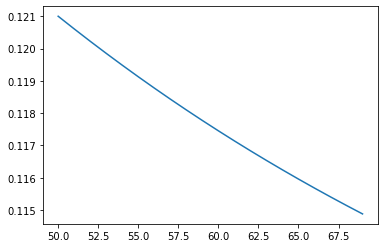

In [176]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(loss_values[i-50:i]) for i in range(len(loss_values))])
plt.show()